# Load Data

In [1]:
import pandas as pd

df = pd.read_csv("Real estate.csv"); df.sample(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
19,20,2012.667,1.5,23.38284,7,24.96772,121.54102,47.7
183,184,2013.500,17.0,4082.01500,0,24.94155,121.50381,18.8
356,357,2012.833,10.3,211.44730,1,24.97417,121.52999,45.3
358,359,2013.167,1.1,193.58450,6,24.96571,121.54089,45.1
157,158,2013.250,16.1,815.93140,4,24.97886,121.53464,35.6
107,108,2013.333,12.2,1360.13900,1,24.95204,121.54842,26.6
388,389,2013.500,10.4,2251.93800,4,24.95957,121.51353,27.3
287,288,2013.000,19.2,461.10160,5,24.95425,121.53990,32.9
302,303,2013.500,16.5,2288.01100,3,24.95885,121.51359,23.2
348,349,2012.833,4.6,259.66070,6,24.97585,121.54516,53.7


In [3]:
df.shape

(414, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# Preprocessing

In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
df.drop(columns="No", inplace=True)

### Making Columns Readable

In [10]:
df.columns = df.columns.str.replace(" ", "_"); df.columns

Index(['X1_transaction_date', 'X2_house_age',
       'X3_distance_to_the_nearest_MRT_station',
       'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude',
       'Y_house_price_of_unit_area'],
      dtype='object')

In [12]:
df.columns = df.columns.str.split('_', n=1).str[1]; df.columns

Index(['transaction_date', 'house_age', 'distance_to_the_nearest_MRT_station',
       'number_of_convenience_stores', 'latitude', 'longitude',
       'house_price_of_unit_area'],
      dtype='object')

In [17]:
df.transaction_date

0      2012.917
1      2012.917
2      2013.583
3      2013.500
4      2012.833
         ...   
409    2013.000
410    2012.667
411    2013.250
412    2013.000
413    2013.500
Name: transaction_date, Length: 414, dtype: float64

In [19]:
df.corr()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_to_the_nearest_MRT_station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number_of_convenience_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price_of_unit_area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


# visualization

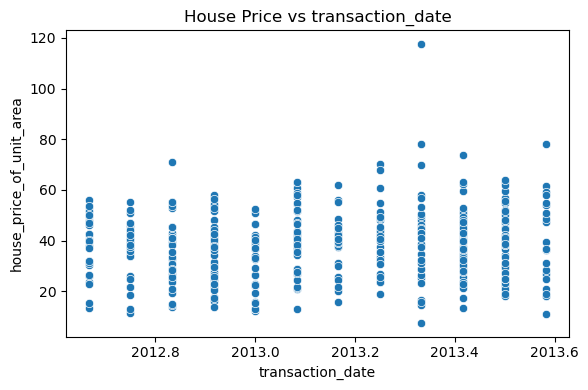

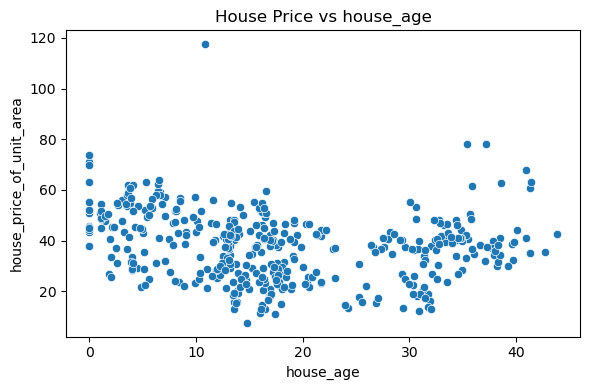

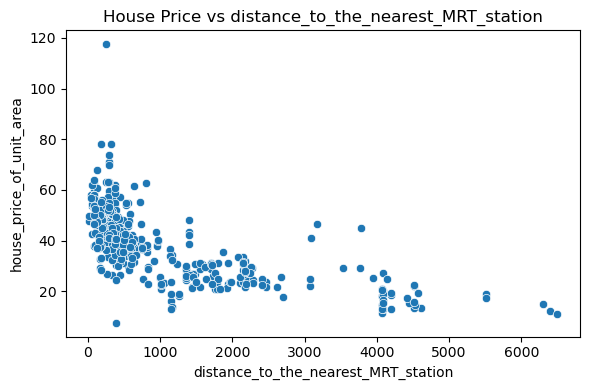

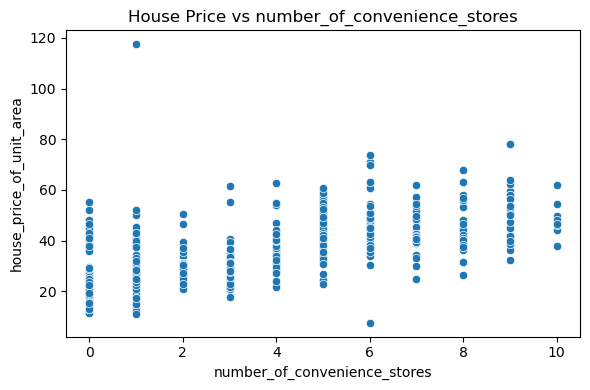

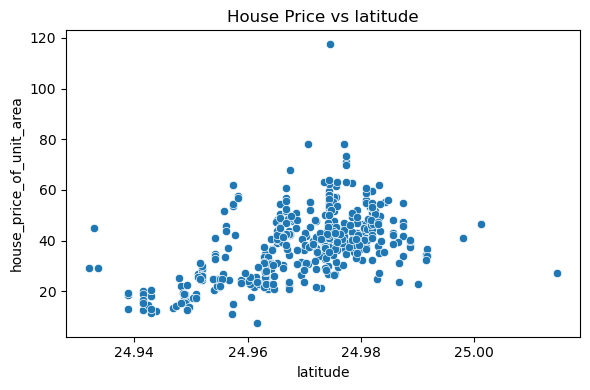

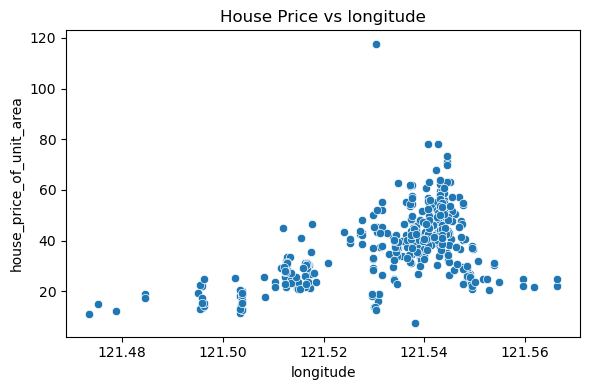

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

target = 'house_price_of_unit_area'
features = [col for col in df.columns if col != target]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y=target, data=df)
    plt.title(f'House Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()


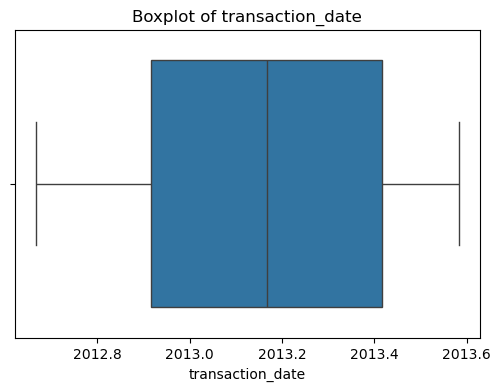

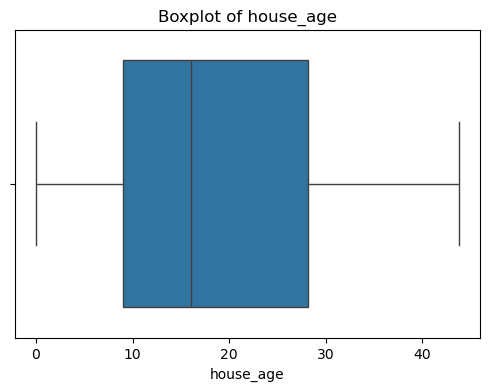

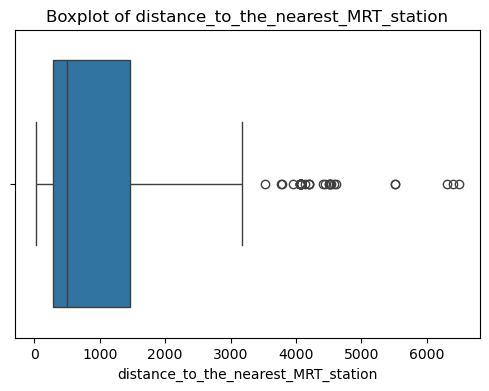

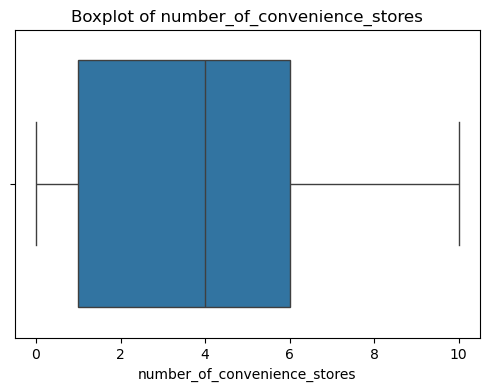

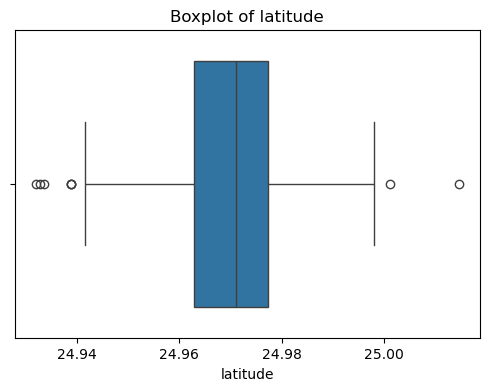

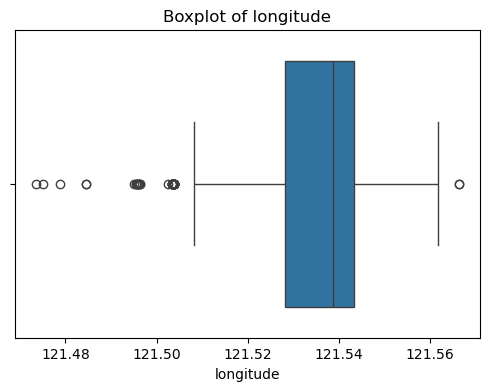

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


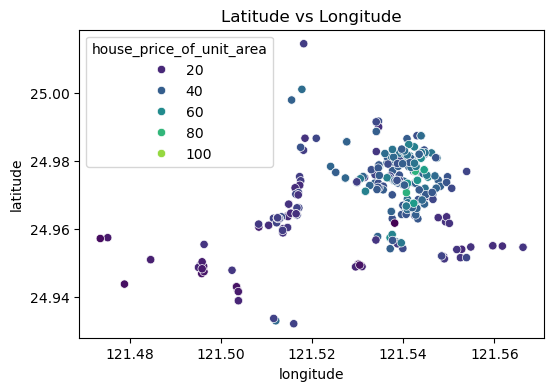

In [40]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x= "longitude", y= "latitude", hue="house_price_of_unit_area", palette="viridis")
plt.title("Latitude vs Longitude")
plt.show()

In [24]:
import folium

# Calculate the center of map 
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

# Initialize map
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Mark on all houses 
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"Price: {row['house_price_of_unit_area']}",
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m.save("Real_Estate_Locations.html")

# Show final Map
m


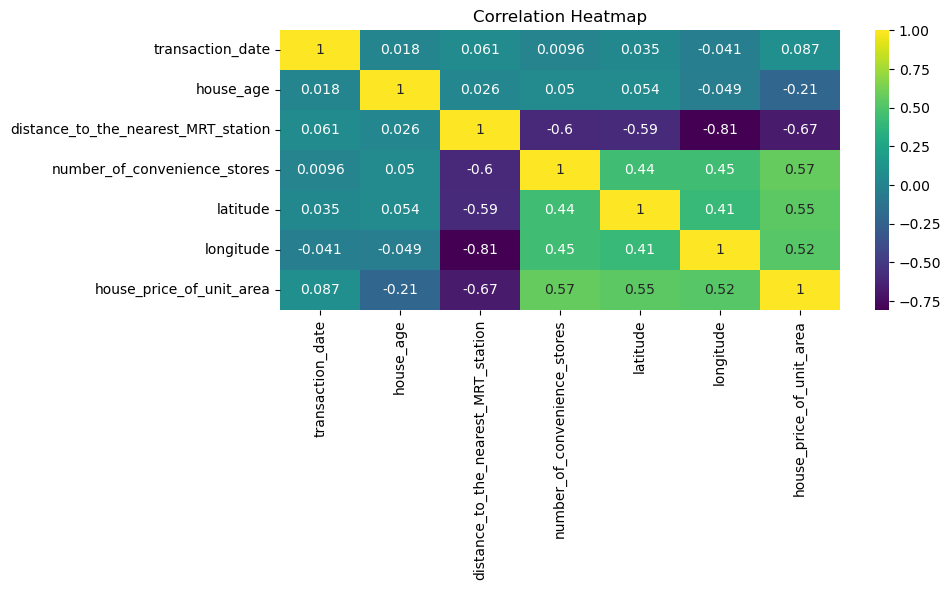

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=df.corr(), cmap="viridis")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [14]:
# drop transaction date column very low corr with y
df.drop(columns="transaction_date", inplace=True);df

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


# Features Selection

In [16]:
X = df.drop(columns="house_price_of_unit_area")
y = df.house_price_of_unit_area

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.3)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (289, 5)
Shape of y_train =  (289,)
Shape of X_test =  (125, 5)
Shape of y_test =  (125,)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_pred_lr = lr.predict(X_train_scaled)
print(f"Training score : {r2_score(y_train,y_train_pred_lr)}")
print(f"Absolute error : {mean_absolute_error(y_train,y_train_pred_lr)}")
print(f"squared error : {mean_squared_error(y_train,y_train_pred_lr)}")

Training score : 0.5721696248503623
Absolute error : 6.230220504046013
squared error : 81.94539155532823


In [218]:
y_test_pred_lr = lr.predict(X_test_scaled)
print(f"Testing score : {r2_score(y_test,y_test_pred_lr)}")
print(f"Absolute error : {mean_absolute_error(y_test,y_test_pred_lr)}")
print(f"squared error : {mean_squared_error(y_test,y_test_pred_lr)}")

Testing score : 0.5571283505007807
Absolute error : 6.151521273181763
squared error : 74.05926303147776


# Using RandomForrestRegressor

In [220]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,                # limit tree depth
    min_samples_split=10,        # min rows for internal node split
    min_samples_leaf=4,          # min rows for leaf node
    random_state=42
)
rfr.fit(X_train_scaled, y_train)

y_train_pred_rfr = rfr.predict(X_train_scaled)
print(f"Training score : {r2_score(y_train,y_train_pred_rfr)}")
print(f"Absolute error : {mean_absolute_error(y_train,y_train_pred_rfr)}")
print(f"squared error : {mean_squared_error(y_train,y_train_pred_rfr)}")

Training score : 0.817350215102722
Absolute error : 3.6266147379229365
squared error : 34.98421105717183


In [222]:
y_test_pred_rfr = rfr.predict(X_test_scaled)
print(f"Testing score : {r2_score(y_test,y_test_pred_rfr)}")
print(f"Absolute error : {mean_absolute_error(y_test,y_test_pred_rfr)}")
print(f"squared error : {mean_squared_error(y_test,y_test_pred_rfr)}")

Testing score : 0.7318705709874965
Absolute error : 4.702699217939055
squared error : 44.83797491253037


# RandomForestRegressor with GridSearchCV

In [224]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4, 6]
}


grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='r2',
                    n_jobs=-1
                   )

grid.fit(X_train_scaled, y_train)

y_train_pred_grid = grid.predict(X_train_scaled)
print(f"Training score : {r2_score(y_train,y_train_pred_grid)}")
print(f"Absolute error : {mean_absolute_error(y_train,y_train_pred_grid)}")
print(f"squared error : {mean_squared_error(y_train,y_train_pred_grid)}")
print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Training score : 0.8223598928118874
Absolute error : 3.5607142240266723
squared error : 34.0246718909778
Best Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.6823314696051552


In [226]:
y_test_pred_grid = grid.predict(X_test_scaled)
print(f"Testing score : {r2_score(y_test,y_test_pred_grid)}")
print(f"Absolute error : {mean_absolute_error(y_test,y_test_pred_grid)}")
print(f"squared error : {mean_squared_error(y_test,y_test_pred_grid)}")

Testing score : 0.7371763811624412
Absolute error : 4.661153572360199
squared error : 43.950710189702335


# RandomForestRegressor+GridSearchCV+PolynomialFeatures

In [228]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('model', RandomForestRegressor(random_state=42))
])

new_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 15, 20],
    'model__min_samples_split': [5, 10],
    'model__min_samples_leaf': [2, 4, 6]
}

grid_poly = GridSearchCV(pipeline, new_param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_poly.fit(X_train_scaled, y_train)

y_train_pred_poly = grid_poly.predict(X_train_scaled)
print(f"Training score : {r2_score(y_train,y_train_pred_poly)}")
print(f"Absolute error : {mean_absolute_error(y_train,y_train_pred_poly)}")
print(f"squared error : {mean_squared_error(y_train,y_train_pred_poly)}")
print("Best Params:", grid_poly.best_params_)
print("Best CV Score:", grid_poly.best_score_)


Training score : 0.8013772224613122
Absolute error : 3.7790566487114194
squared error : 38.043631828436375
Best Params: {'model__max_depth': 10, 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best CV Score: 0.6657557415906684


In [230]:
y_test_pred_poly = grid_poly.predict(X_test_scaled)
print(f"Testing score : {r2_score(y_test,y_test_pred_poly)}")
print(f"Absolute error : {mean_absolute_error(y_test,y_test_pred_poly)}")
print(f"squared error : {mean_squared_error(y_test,y_test_pred_poly)}")

Testing score : 0.7328989904352704
Absolute error : 4.52142659876212
squared error : 44.665997350915184


# Trying XBoost

In [232]:
from xgboost import XGBRegressor

xb = XGBRegressor(random_state = 42)
xb.fit(X_train_scaled, y_train)

y_train_pred_xb = xb.predict(X_train_scaled)
print(f"Training score : {r2_score(y_train,y_train_pred_xb)}")
print(f"Absolute error : {mean_absolute_error(y_train,y_train_pred_xb)}")
print(f"squared error : {mean_squared_error(y_train,y_train_pred_xb)}")

Training score : 0.9909911863597609
Absolute error : 0.4662440369285925
squared error : 1.725522085569949


In [234]:
y_test_pred_xb = xb.predict(X_test_scaled)
print(f"Testing score : {r2_score(y_test, y_test_pred_xb)}")
print(f"Absolute error : {mean_absolute_error(y_test, y_test_pred_xb)}")
print(f"squared error : {mean_squared_error(y_test, y_test_pred_xb)}")

Testing score : 0.7067536205342454
Absolute error : 4.8117127243042
squared error : 49.038159869660255


# XGBRegressor with Tuning

In [248]:
param_grid_3 = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

xb_grid = GridSearchCV(xb , param_grid_3, cv=10, scoring='r2', n_jobs=-1)
xb_grid.fit(X_train_scaled, y_train)

y_train_pred_xbgrid = xb_grid.predict(X_train_scaled)
y_test_pred_xbgrid = xb_grid.predict(X_test_scaled)

print("Training Results:")
print("R² Score:", r2_score(y_train, y_train_pred_xbgrid))
print("MAE:", mean_absolute_error(y_train, y_train_pred_xbgrid))
print("MSE:", mean_squared_error(y_train, y_train_pred_xbgrid))

Training Results:
R² Score: 0.8742387617608012
MAE: 3.5192081887004285
MSE: 24.087943513570313


In [250]:
print("Best Params:", xb_grid.best_params_)
print("Best CV Score:", xb_grid.best_score_)

Best Params: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best CV Score: 0.6700528152954046


In [252]:
print(f"Testing score : {r2_score(y_test, y_test_pred_xbgrid)}")
print(f"Absolute error : {mean_absolute_error(y_test, y_test_pred_xbgrid)}")
print(f"squared error : {mean_squared_error(y_test, y_test_pred_xbgrid)}")

Testing score : 0.7502673081380252
Absolute error : 4.478421365356446
squared error : 41.76157840556822


In [258]:
pd.DataFrame({"Original" : y_test, "Predicted" : y_test_pred_xbgrid})

,Original,Predicted
358,45.1,48.744831
350,42.3,39.244793
373,52.2,51.806828
399,37.3,39.369034
369,22.8,24.788397
...,...,...
268,40.1,41.560375
148,45.1,23.050783
16,70.1,63.253971
66,50.7,48.744831


In [260]:
import pickle

# Save
with open('Real_Estate.pkl', 'wb') as f:
    pickle.dump(xb_grid, f)


In [36]:
import pickle

# Load
with open('Real_Estate.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use for prediction
y_pred_final = loaded_model.predict(X_test_scaled)


In [38]:
pd.DataFrame({"Original" : y_test, "Predicted" : y_pred_final}).sample(20)

,Original,Predicted
400,35.5,40.881836
399,37.3,39.369034
137,47.4,47.026772
286,56.3,56.999081
296,34.1,35.575386
118,30.6,24.938656
108,34.1,37.597092
45,38.3,42.507805
73,20.0,17.685232
266,23.7,26.126278


In [22]:
import joblib

joblib.dump(scaler, "Scaler.pkl")

['Scaler.pkl']

In [28]:
df.to_csv("Cleaned_Real_Estate.csv", index=False)